In [9]:
from ultralytics import YOLO

# Tải mô hình YOLOv8 đã huấn luyện sẵn
model = YOLO('yolov8n.pt')



0: 640x480 2 persons, 322.7ms
Speed: 17.2ms preprocess, 322.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 480)


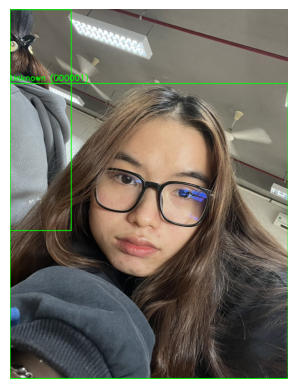

Student ID: 000001, Name: Unknown
Student ID: 000002, Name: Unknown


In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# Danh sách chứa thông tin của các sinh viên (Mã số sinh viên và tên)
students_info = {
    "2274601080005": "Bùi Thị Trúc Giang",
    "2274601080006": "Trương Minh Hiếu",
}

# Tải mô hình YOLOv8
model = YOLO('yolov8n.pt')

# Đọc hình ảnh
image = cv2.imread('1.jpg')

# Dự đoán đối tượng trong hình ảnh
results = model(image)

# Dictionary để lưu trữ tên và id của các khuôn mặt
faces_info = {}

# Vị trí trước đó của khuôn mặt
prev_faces_positions = {}

# Ngưỡng để xác định xem khuôn mặt có thay đổi đáng kể không
threshold_distance = 50

# Số frame giữa các lần nhận diện khuôn mặt
face_detection_interval = 5

frame_count = 0

# Vẽ khung nhận diện lên hình ảnh và gán mã số sinh viên và tên của người cho từng khuôn mặt
face_id = 0
for result in results:
    boxes = result.boxes  # Lấy danh sách các khung nhận diện
    for box in boxes:
        # Lấy tọa độ của khung nhận diện
        x1, y1, x2, y2 = box.xyxy[0].int().numpy()
        # Lấy mã số sinh viên và tên của người từ thông tin sinh viên
        student_id = f"{face_id + 1:06d}"  # Mã số sinh viên (ví dụ: 000001, 000002, ...)
        student_name = students_info.get(student_id, "Unknown")  # Tên của sinh viên
        # Gán mã số sinh viên và tên của người cho từng khuôn mặt
        face_info = {'student_id': student_id, 'student_name': student_name}
        
        # Kiểm tra xem có cần xử lý khuôn mặt này hay không
        prev_face_pos = prev_faces_positions.get(face_id)
        if prev_face_pos is not None:
            # Tính khoảng cách Euclid giữa vị trí trước đó và vị trí hiện tại của khuôn mặt
            distance = np.linalg.norm(np.array([x1, y1]) - np.array(prev_face_pos))
            if distance < threshold_distance:
                # Bỏ qua khuôn mặt này vì không thay đổi đáng kể
                continue
                
        # Lưu vị trí hiện tại của khuôn mặt
        prev_faces_positions[face_id] = [x1, y1]
        
        # Vẽ khung nhận diện lên hình ảnh
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # Ghi nhãn tên lên hình ảnh
        cv2.putText(image, f"{student_name} ({student_id})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        
        faces_info[(x1, y1, x2, y2)] = face_info
        face_id += 1

# Chuyển đổi màu từ BGR sang RGB để hiển thị bằng matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị hình ảnh
plt.imshow(image)
plt.axis('off')  # Ẩn trục
plt.show()

# In thông tin về các khuôn mặt
for face_info in faces_info.values():
    print(f"Student ID: {face_info['student_id']}, Name: {face_info['student_name']}")

In [11]:
import cv2
from ultralytics import YOLO
import numpy as np

# Danh sách chứa thông tin của các sinh viên (Mã số sinh viên và tên)
students_info = {
    "2274601080005": "Bùi Thị Trúc Giang",
    "2274601080006": "Trương Minh Hiếu",
    # Thêm các thông tin khác nếu cần
}

# Tải mô hình YOLOv8
model = YOLO('yolov8n.pt')

# Đọc video
video_path = 'cafecm.mp4' #chọn video
output_path = 'copy5.mp4' # đặt tên cho video sau khi xử lý xong
cap = cv2.VideoCapture(video_path)

# Thiết lập thông số ghi video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

# Khởi tạo biến lưu trữ vị trí trước đó của các khuôn mặt
prev_faces_positions = {}

# Ngưỡng để xác định xem khuôn mặt có thay đổi đáng kể không
threshold_distance = 50

# Số frame giữa các lần nhận diện khuôn mặt
face_detection_interval = 10

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    frame_count += 1

    # Dự đoán đối tượng trong từng khung hình mỗi face_detection_interval frame
    if frame_count % face_detection_interval == 0:
        results = model(frame)
        
        # Dictionary để lưu trữ tên và id của các khuôn mặt
        faces_info = {}

        # Gán mã số sinh viên và tên của người cho từng khuôn mặt
        face_id = 0
        for result in results:
            boxes = result.boxes  # Lấy danh sách các khung nhận diện
            for box in boxes:
                # Lấy tọa độ của khung nhận diện
                x1, y1, x2, y2 = box.xyxy[0].int().numpy()
                # Lấy mã số sinh viên và tên của người từ thông tin sinh viên
                student_id = f"{face_id + 1:06d}"  # Mã số sinh viên (ví dụ: 000001, 000002, ...)
                student_name = students_info.get(student_id, "Unknown")  # Tên của sinh viên

                # Kiểm tra xem khuôn mặt có thay đổi đáng kể so với khung hình trước đó hay không
                prev_face_pos = prev_faces_positions.get(face_id)
                if prev_face_pos is not None:
                    # Tính khoảng cách Euclid giữa vị trí trước đó và vị trí hiện tại của khuôn mặt
                    distance = np.linalg.norm(np.array([x1, y1]) - np.array(prev_face_pos))
                    if distance < threshold_distance:
                        # Bỏ qua khung hình này nếu khuôn mặt không thay đổi đáng kể
                        continue

                # Lưu vị trí hiện tại của khuôn mặt
                prev_faces_positions[face_id] = [x1, y1]

                # Gán mã số sinh viên và tên của người cho từng khuôn mặt
                face_info = {'student_id': student_id, 'student_name': student_name}
                # Vẽ khung nhận diện lên khung hình
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"{student_name} ({student_id})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                face_id += 1
    
    # Ghi khung hình đã xử lý vào video output
    out.write(frame)

cap.release()
out.release()

print(f"Video with detections saved to {output_path}")



0: 640x384 7 persons, 1 keyboard, 208.3ms
Speed: 12.1ms preprocess, 208.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 144.3ms
Speed: 1.1ms preprocess, 144.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 138.6ms
Speed: 2.0ms preprocess, 138.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 4 persons, 207.1ms
Speed: 3.3ms preprocess, 207.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 5 persons, 1 cell phone, 193.4ms
Speed: 1.8ms preprocess, 193.4ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 201.4ms
Speed: 4.3ms preprocess, 201.4ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 3 persons, 2 cell phones, 210.8ms
Speed: 6.1ms preprocess, 210.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 persons, 1 keyboard, 212.6ms
Speed: 2.1ms

In [12]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import time

# Danh sách chứa thông tin của các sinh viên (Mã số sinh viên và tên)
students_info = {
    "2274601080005": "Bùi Thị Trúc Giang",
    "2274601080006": "Trương Minh Hiếu",
    # Thêm các thông tin khác nếu cần
}

# Tải mô hình YOLOv8
model = YOLO('yolov8n.pt')

# Mở camera
cap = cv2.VideoCapture(0)

# Khởi tạo biến lưu trữ vị trí trước đó của các khuôn mặt
prev_faces_positions = {}

# Ngưỡng để xác định xem khuôn mặt có thay đổi đáng kể không
threshold_distance = 50

# Thiết lập frame rate cho việc nhận diện khuôn mặt
face_detection_fps = 5  # Số lượng frame mỗi giây

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Thực hiện nhận diện khuôn mặt mỗi face_detection_fps frame
    if int(time.time() * face_detection_fps) % 2 == 0:
        # Dự đoán đối tượng trong từng khung hình
        results = model(frame)

        # Gán mã số sinh viên và tên của người cho từng khuôn mặt
        face_id = 0
        for result in results:
            boxes = result.boxes  # Lấy danh sách các khung nhận diện
            for box in boxes:
                # Lấy tọa độ của khung nhận diện
                x1, y1, x2, y2 = box.xyxy[0].int().numpy()
                # Lấy mã số sinh viên và tên của người từ thông tin sinh viên
                student_id = f"{face_id + 1:06d}"  # Mã số sinh viên (ví dụ: 000001, 000002, ...)
                student_name = students_info.get(student_id, "Unknown")  # Tên của sinh viên

                # Kiểm tra xem khuôn mặt có thay đổi đáng kể so với khung hình trước đó hay không
                prev_face_pos = prev_faces_positions.get(face_id)
                if prev_face_pos is not None:
                    # Tính khoảng cách Euclid giữa vị trí trước đó và vị trí hiện tại của khuôn mặt
                    distance = np.linalg.norm(np.array([x1, y1]) - np.array(prev_face_pos))
                    if distance < threshold_distance:
                        # Bỏ qua khuôn mặt này nếu khoảng cách nhỏ hơn ngưỡng
                        continue

                # Lưu vị trí hiện tại của khuôn mặt
                prev_faces_positions[face_id] = [x1, y1]

                # Gán mã số sinh viên và tên của người cho từng khuôn mặt
                face_info = {'student_id': student_id, 'student_name': student_name}
                # Vẽ khung nhận diện lên khung hình
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"{student_name} ({student_id})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                face_id += 1

    # Hiển thị khung hình
    cv2.imshow('Frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
